In [1]:
import pandas as pd 
import numpy as np

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
import scattertext as st

In [17]:
import re

In [261]:
df = pd.read_csv('cleaned_dataset.csv')

In [262]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,text_cleaned,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat
0,0,0,0,1,37,USA,m,married,y,24h,...,"['wife', 'celebrating', 'year', 'anniversary', 'today']",[celebrating],"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1
1,1,1,1,1,37,USA,m,married,y,24h,...,"['mother', 'called', 'blue', 'tell', 'proud']","[called, tell]","[mother, blue]","[mother, she]",[],[called],[me],1,1,1
2,2,2,2,1,37,USA,m,married,y,24h,...,"['today', 'took', 'day', 'time', 'job', 'brunch', 'date', 'wonderful', 'wife']","[took, go, have]","[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1
3,3,3,3,1,37,USA,m,married,y,24h,...,"['just', 'got', 'bonus', 'mturk', 'task']",[got],"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1
4,4,4,4,1,37,USA,m,married,y,24h,...,"['wife', 'cooked', 'surprise', 'dinner', 'work']","[cooked, take, work]","[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1


# Wives and Husbands

## Basic Visualizations

In [263]:
# Create a new column that labels each row as having the word 'wife' or 'husband' in it.

df['wife_husband_label'] = 'other'

counter = 0
for row in df['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'wife':
            df.set_value(counter, 'wife_husband_label', 'wife')
        elif word == 'husband':
            df.set_value(counter, 'wife_husband_label', 'husband')
    counter += 1

df.head()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,verbs,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat,wife_husband_label
0,0,0,0,1,37,USA,m,married,y,24h,...,[celebrating],"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1,wife
1,1,1,1,1,37,USA,m,married,y,24h,...,"[called, tell]","[mother, blue]","[mother, she]",[],[called],[me],1,1,1,other
2,2,2,2,1,37,USA,m,married,y,24h,...,"[took, go, have]","[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1,wife
3,3,3,3,1,37,USA,m,married,y,24h,...,[got],"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1,other
4,4,4,4,1,37,USA,m,married,y,24h,...,"[cooked, take, work]","[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1,wife


In [264]:
# The number of entries with the word 'wife'.
len(df[df['wife_husband_label']=='wife'][['wife_husband_label', 'text']])

2690

In [265]:
# The number of entries with the word 'husband'.
len(df[df['wife_husband_label']=='husband'][['wife_husband_label', 'text']])

2638

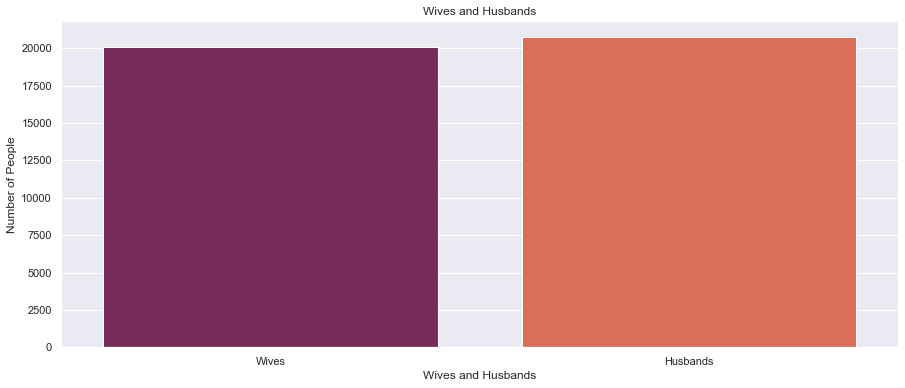

In [144]:
# Visual of the total number of 'Wife' and 'Husband' responders.
wives = df[(df['marital'] == 'married') & (df['gender'] == 'f')]
husbands = df[(df['marital'] == 'married') & (df['gender'] == 'm')]

x = ['Wives', 'Husbands']
y = [len(wives.values),len(husbands.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Wives and Husbands")
plt.xlabel("Wives and Husbands")
plt.ylabel("Number of People")
plt.show()

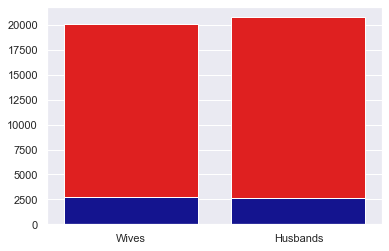

In [230]:
# Red is the total number of wife and husband responders. Blue is the times wives and husbands
# were mentioned in the happiness snippets.

sns.barplot(x = ['Wives', 'Husbands'], 
            y = [len(wives.values),len(husbands.values)], 
            color = "red")

bottom_plot = sns.barplot(x = ['Wives', 'Husbands'], 
                          y = [len(df[df['wife_husband_label']=='wife']), 
                               len(df[df['wife_husband_label']=='husband'])], 
                               color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l.draw_frame(False)


## Husband Wife Dataframe

In [266]:
# Make a new dataframe of snippets where wives or husbands were mentioned
df_husband_wife = df[(df['wife_husband_label']=='wife') | (df['wife_husband_label']=='husband')]

df_husband_wife.shape

(5328, 22)

In [267]:
# I noticed a couple duplicates in the text_cleaned column. Remove those.

df_husband_wife = df_husband_wife.drop_duplicates(subset=['text_cleaned'])
df_husband_wife.shape

(5089, 22)

In [268]:
# Remove the user that keeps mentioning 'Roti', his wife. The IDs are different for each entry,
# and the spelling is very slightly different, so this has to be done manually.
counter = 0
for row in df_husband_wife['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'roti':
            df_husband_wife = df_husband_wife[df_husband_wife.text_cleaned != row]
    counter += 1
    
df_husband_wife.shape

(5079, 22)

In [269]:
# Create a new column of cleaned text without the words 'wife' or 'husband' in them.
remove_words = ['wife', 'husband']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df_husband_wife['text_cleaned_no_husband_wife'] = df_husband_wife['text_cleaned'].str.replace(pat, '')

In [270]:
df_husband_wife.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat,wife_husband_label,text_cleaned_no_husband_wife
0,0,0,0,1,37,USA,m,married,y,24h,...,"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1,wife,"['', 'celebrating', 'year', 'anniversary', 'today']"
2,2,2,2,1,37,USA,m,married,y,24h,...,"[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1,wife,"['today', 'took', 'day', 'time', 'job', 'brunch', 'date', 'wonderful', '']"
4,4,4,4,1,37,USA,m,married,y,24h,...,"[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1,wife,"['', 'cooked', 'surprise', 'dinner', 'work']"
8,8,8,8,1,37,USA,m,married,y,24h,...,"[wife, I, phone]","[wife, i]",[],[surprised],"[me, phone]",1,1,1,wife,"['', 'surprised', 'bought', 'new', 'iphone', 'upgrade']"
20,20,20,20,1,37,USA,m,married,y,24h,...,"[wife, grocery, shopping, today, time, kids]","[wife, time]",[],[went],[shopping],1,1,1,wife,"['', 'went', 'grocery', 'shopping', 'today', 'fun', 'time', 'hanging', 'kid']"


## Scatterplot

In [242]:
corpus = st.CorpusFromPandas(df_husband_wife,
                             category_col='wife_husband_label',
                             text_col='text_cleaned_no_husband_wife',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [243]:
html = st.produce_scattertext_explorer(corpus,
                                       category='wife',
                                       category_name='Wife',
                                       not_category_name='Husband',
                                       minimum_term_frequency=50,
                                       pmi_threshold_coefficient=5,
                                       width_in_pixels=1000
                                      )

In [244]:
open('wife_husband.html', 'wb').write(html.encode('utf-8'));

In [248]:
# Exploring one of the top words mentioned in relation to wives: Sex
counter = 0
for row in df_husband_wife['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'sex':
            print(df_husband_wife.iloc[counter]['text'])
    counter += 1

My wife and I had sex and it was really, really good.
My wife and I had some really good sex this morning.
My wife and I have increased the amount of sex we are having.
My wife an I had some really awesome sex this morning.
I had sex with my wife 
My husband and i were able to have succesful, non-painful penetrative sex for the first time in 4 months.
My wife and I had passionate sex after a long hiatus due to caring for newborn. 
I enjoyed have sex with my wife in the bedroom
I love have sex with my wife in my bed
my life in my husband sex is well good day in my life dailly sex in my life varry varry enjing my life in My mom used to come home from school and spontaneously bake once in a while. Cookies, cake or whatever, but my sister and I would get to lick the beaters and bowl. in ,my life in world 
my life in my husband sex is well good day in my life dailly sex in my life varry varry enjing my life in My mom used to come home from school and spontaneously bake once in a while. Cook

In [249]:
# Exploring one of the top words mentioned in relation to husbands: Flower
counter = 0
for row in df_husband_wife['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'flower':
            print(df_husband_wife.iloc[counter]['text'])
    counter += 1
    
# Example: My husband surprised me with beautiful flowers.

I used an ice chopper to edge my wife's flower garden, doesn't sound like much but it worked great. 
My husband a brought me icecream and a live flower at work.
Today is my marriage anniversary we went outside, my husband fought me a bunch of flowers red roses
Purchased some beautiful flowers and a vase and arranged them for my wife.
I just ordered flowers for my mom and wife, who is also a mother now, and feeling great to have them both here with me.
I was feeling grateful thinking about spending time with my mom and wife on mother's day, I ordered flowers for them.
Seeing that my newly planted Icelandic Poppy didn't die like my husband said it would and in fact is thriving in its new spot with three new flowers that just bloomed! 
Writing a sweet card for my wife and getting her flowers
My husband brought me flowers just because.
I received some flowers from  my husband
My wife got me flowers.
  after attending my sister's high school graduation I left to spend a month of summer vaca

# Sons and Daughters

## Basic Visualizations

In [271]:
# Create a new column that labels each row as having the word 'son' or 'daughter' in it.

df['son_daughter_label'] = 'none'

counter = 0
for row in df['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'son':
            df.set_value(counter, 'son_daughter_label', 'son')
        elif word == 'daughter':
            df.set_value(counter, 'son_daughter_label', 'daughter')
    counter += 1

df.head()

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,nouns,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat,wife_husband_label,son_daughter_label
0,0,0,0,1,37,USA,m,married,y,24h,...,"[wife, year, anniversary, today]",[wife],[],[celebrating],[anniversary],1,1,1,wife,none
1,1,1,1,1,37,USA,m,married,y,24h,...,"[mother, blue]","[mother, she]",[],[called],[me],1,1,1,other,none
2,2,2,2,1,37,USA,m,married,y,24h,...,"[Today, day, part, time, job, brunch, date, wife]",[i],[],[took],"[day, date]",1,1,1,wife,none
3,3,3,3,1,37,USA,m,married,y,24h,...,"[bonus, mturk, task]",[I],[],[got],[bonus],1,1,1,other,none
4,4,4,4,1,37,USA,m,married,y,24h,...,"[wife, surprise, dinner]",[wife],[],[cooked],[dinner],1,1,1,wife,none


In [272]:
# The number of entries with the word 'son'.
len(df[df['son_daughter_label']=='son'])

3419

In [273]:
# The number of entries with the word 'daughter'.
len(df[df['son_daughter_label']=='daughter'])

3267

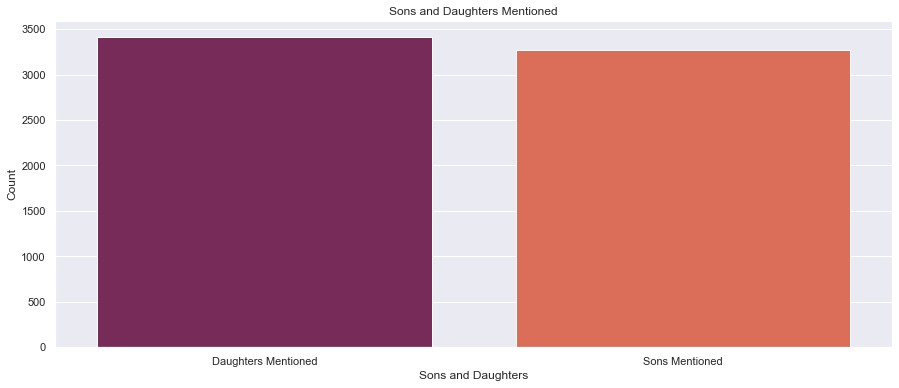

In [274]:
# Visual of the total number of daughters and sons mentioned.
daughter = df[df['son_daughter_label']=='son']
son = df[df['son_daughter_label']=='daughter']

x = ['Daughters Mentioned', 'Sons Mentioned']
y = [len(daughter.values),len(son.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Sons and Daughters Mentioned")
plt.xlabel("Sons and Daughters")
plt.ylabel("Count")
plt.show()

In [300]:
# Total mothers
print('Total Mothers: ', len(df[(df['gender'] == 'f') & (df['parenthood'] == 'y')]))

# Sons mentioned by mothers
print('Sons mentioned by mothers: ', len(df[(df['son_daughter_label']=='son') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]))

# Daughters mentioned by mothers
print('Daughters mentioned by mothers: ', len(df[(df['son_daughter_label']=='daughter') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]))

# Neither mentioned by mothers
print('Neither mentioned by mothers: ', len(df[(df['son_daughter_label']=='none') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]))

print(' ')

# Total fathers
print('Total fathers: ', len(df[(df['gender'] == 'm') & (df['parenthood'] == 'y')]))

# Sons mentioned by fathers
print('Sons mentioned by fathers: ', len(df[(df['son_daughter_label']=='son') & (df['gender'] == 'm') & (df['parenthood'] == 'y')]))

# Daughters mentioned by fathers
print('Daughters mentioned by fathers: ', len(df[(df['son_daughter_label']=='daughter') & (df['gender'] == 'm') & (df['parenthood'] == 'y')]))

# Neither mentioned by mothers
print('Neither mentioned by mothers: ', len(df[(df['son_daughter_label']=='none') & (df['gender'] == 'm') & (df['parenthood'] == 'y')]))

Total Mothers:  20612
Sons mentioned by mothers:  1988
Daughters mentioned by mothers:  1915
Neither mentioned by mothers:  16709
 
Total fathers:  18343
Sons mentioned by fathers:  1245
Daughters mentioned by fathers:  1224
Neither mentioned by mothers:  15874


Text(0, 0.5, 'Pies Consumed')

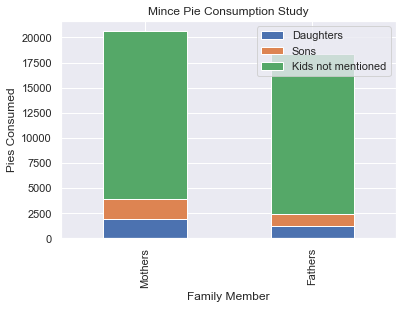

In [292]:
# Sons vs Daughters mentioned by Mothers and Fathers

plotdata = pd.DataFrame({
    "Daughters":[len(df[(df['son_daughter_label']=='daughter') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]),
                len(df[(df['son_daughter_label']=='daughter') & (df['gender'] == 'm') & (df['parenthood'] == 'y')])],
    "Sons":[len(df[(df['son_daughter_label']=='son') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]),
           len(df[(df['son_daughter_label']=='son') & (df['gender'] == 'm') & (df['parenthood'] == 'y')])],
    "Kids not mentioned":[len(df[(df['son_daughter_label']=='none') & (df['gender'] == 'f') & (df['parenthood'] == 'y')]),
                        len(df[(df['son_daughter_label']=='none') & (df['gender'] == 'm') & (df['parenthood'] == 'y')])],
    }, 
    index=['Mothers', 'Fathers']
)
plotdata.plot(kind="bar", stacked=True)
plt.title("Mince Pie Consumption Study")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

## Son Daughter Dataframe

In [312]:
# Make a new dataframe of snippets where wives or husbands were mentioned
df_son_daughter = df[(df['son_daughter_label']=='son') | (df['son_daughter_label']=='daughter')]

df_son_daughter.shape

(6686, 23)

In [313]:
# I noticed a couple duplicates in the text_cleaned column. Remove those.

df_son_daughter = df_son_daughter.drop_duplicates(subset=['text_cleaned'])
df_son_daughter.shape

(6382, 23)

In [314]:
# Remove the user that keeps mentioning 'Roti', his wife. The IDs are different for each entry,
# and the spelling is very slightly different, so this has to be done manually.
counter = 0
for row in df_son_daughter['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'roti':
            df_son_daughter = df_son_daughter[df_son_daughter.text_cleaned != row]
    counter += 1
    
df_son_daughter.shape

(6372, 23)

In [315]:
# Create a new column of cleaned text without the words 'wife' or 'husband' in them.
remove_words = ['son', 'daughter']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df_son_daughter['text_cleaned_no_son_daughter'] = df_son_daughter['text_cleaned'].str.replace(pat, '')

In [316]:
df_son_daughter.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,wid,age,country,gender,marital,parenthood,reflection_period,...,proto_agent,passive_agent,root_verb,direct_object,parenthood_cat,gender_cat,marital_cat,wife_husband_label,son_daughter_label,text_cleaned_no_son_daughter
5,5,5,5,1,37,USA,m,married,y,24h,...,"[I, he, He, he]",[],"[bought, texted]","[son, gift, it, me, me, it]",1,1,1,other,son,"['bought', '', 'gift', 'mta', 'store', 'left', 'bed', 'got', 'home', 'school', 'texted', 'little', 'ago', 'told', 'loved']"
7,7,7,7,1,37,USA,m,married,y,24h,...,[],[son],[accepted],[],1,1,1,other,son,"['oldest', '', 'got', 'accepted', 'high', 'school', 'excited']"
9,9,9,9,1,37,USA,m,married,y,24h,...,"[parents, they]",[],[told],"[me, birthday]",1,1,1,other,son,"['parent', 'told', 'stopping', 'celebrate', '', 'birthday', 'u', 'weekend']"
11,11,11,11,1,37,USA,m,married,y,24h,...,"[I, he]",[],[took],"[son, time]",1,1,1,other,son,"['took', '', 'transit', 'museum', 'time']"
16,16,16,16,1,37,USA,m,married,y,24h,...,"[mom, she]",[],[called],[cake],1,1,1,other,son,"['mom', 'called', 'said', 'wa', 'buying', '', 'birthday', 'cake', 'week']"


## Scatterplot

In [317]:
corpus = st.CorpusFromPandas(df_son_daughter,
                             category_col='son_daughter_label',
                             text_col='text_cleaned_no_son_daughter',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [318]:
html = st.produce_scattertext_explorer(corpus,
                                       category='son',
                                       category_name='Son',
                                       not_category_name='Daughter',
                                       minimum_term_frequency=50,
                                       pmi_threshold_coefficient=5,
                                       width_in_pixels=1000
                                      )

In [319]:
open('son_daughter.html', 'wb').write(html.encode('utf-8'));

In [320]:
# Exploring one of the top words mentioned in relation to daughters: baby
counter = 0
for row in df_son_daughter['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'baby':
            print(df_son_daughter.iloc[counter]['text'])
    counter += 1
    
# Common: Somebody's ~daughter~ had a baby

I got the news that my god daughter just had a beautiful baby boy.
my neighbours daughter delivered a baby girl yesterday 
Yesterday My cousin invited me for his son's first birthday. It was a surprise and a happy occasion as the baby was a precious one which born after 14 years of marriage.
My baby daughter was meeting a bunch of family member s for the first time and she had a smile on her face the whole time. 
We bought baby floaties and tested them out on my daughter for the first time in the tub. 
My baby daughter wouldn't go to sleep at the restaurant but we were able to make her laugh a lot and she remained in a good mood. 
After a long day of work, getting my baby daughter to break out in laughter when playing with her.
My baby daughter saw me in the morning and she turn up a huge smile and reached out arms out for a hug.
At my daughter's school, i found a baby turtle in the grass and we took it in the school and showed all the kids in the classroom.
we have celebrated our daug

In [323]:
# Exploring one of the top words mentioned in relation to daughters: baby
counter = 0
for row in df_son_daughter['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'hit':
            print(df_son_daughter.iloc[counter]['text'])
    counter += 1
    
# Common: Somebody's ~daughter~ had a baby

My son hit a scored a goal in his soccer game.
Policeman at an accident who was calming down a mother and child who had been hit. He put them in the back of his car and gave the child a toy from his trunk. He got on the child eye level and spoke to him quietly and calmly till his father came. I overheard the cop say he had a son his age and he was asking him questions too.

We had a soccer game for our twin daughters this morning and they BOTH scored. One usually plays defense and rarely gets the chance to score, but today she took the ball and went streaking down the field and hit a shot in the upper 90. It was beautiful shot.
My oldest son hit a ground-rule double at his t-ball practice.
We went to my cousinas wedding. It was a lovely wedding very unlike any wedding Iave yet been to, but a lot like the weddings in the movies (you know, like The Wedding Crashersa| never understood why someone would *want* to go to a wedding they werenat invited to).  The ceremony was short and simple,

# Mothers and Fathers

## Basic Visualizations

In [334]:
# Create a new column that labels each row as having the word 'son' or 'daughter' in it.

df['mother_father_label'] = 'none'

counter = 0
for row in df['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if (word == 'mother') or (word == 'mom') or (word == 'mommy') or (word == 'mama') or (word == 'ma'):
            df.set_value(counter, 'mother_father_label', 'mother')
        elif (word == 'father') or (word == 'dad') or (word == 'daddy') or (word == 'papa') or (word == 'pa'):
            df.set_value(counter, 'mother_father_label', 'father')
    counter += 1

df.head()[['text', 'mother_father_label']]

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


,text,mother_father_label
0,My wife and i are celebrating our ten year anniversary today.,none
1,My mother called out of the blue to tell me how proud she is of me.,mother
2,Today i took the day off from my part time job to go and have a brunch date with my wonderful wife.,none
3,I just got a $21 bonus on a mturk task!,none
4,My wife cooked me a surprise dinner to take to work with me.,none


In [335]:
# The number of entries with the word 'mother'.
len(df[df['mother_father_label']=='mother'])

2851

In [333]:
# The number of entries with the word 'father'.
len(df[df['mother_father_label']=='father'])

1500

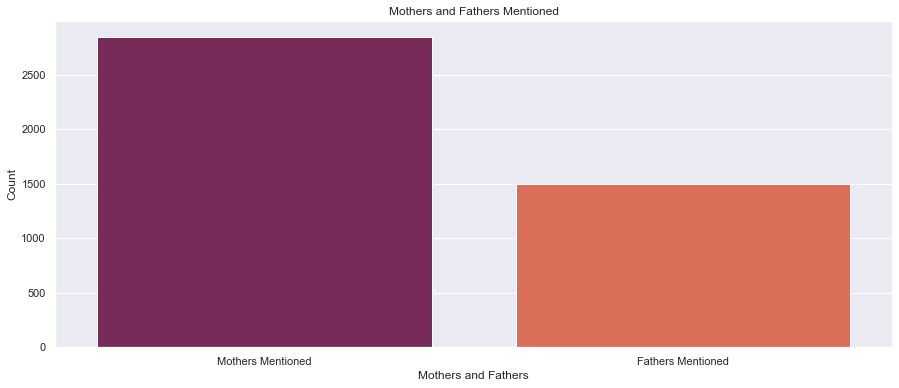

In [336]:
# Visual of the total number of daughters and sons mentioned.
mother_mentioned = df[df['mother_father_label']=='mother']
father_mentioned = df[df['mother_father_label']=='father']

x = ['Mothers Mentioned', 'Fathers Mentioned']
y = [len(mother_mentioned.values),len(father_mentioned.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Mothers and Fathers Mentioned")
plt.xlabel("Mothers and Fathers")
plt.ylabel("Count")
plt.show()

In [341]:
# Total women
total_women = len(df[(df['gender'] == 'f')])
print('total_women', total_women)

# Women mentioning mothers
women_mentioning_mothers = len(df[(df['gender'] == 'f') & (df['mother_father_label'] == 'mother')])
print('women_mentioning_mothers: ', women_mentioning_mothers)

# Women mentioning fathers
women_mentioning_fathers = len(df[(df['gender'] == 'f') & (df['mother_father_label'] == 'father')])
print('women_mentioning_fathers: ', women_mentioning_fathers)

# Women mentioning neither
women_mentioning_none = len(df[(df['gender'] == 'f') & (df['mother_father_label'] == 'none')])
print('women_mentioning_none: ', women_mentioning_none)

print(' ')

# Total men
total_men = len(df[(df['gender'] == 'm')])
print('total_men: ', total_men)

# Men mentioning mother
men_mentioning_mothers = len(df[(df['gender'] == 'm') & (df['mother_father_label'] == 'mother')])
print('men_mentioning_mothers: ', men_mentioning_mothers)

# Men mentioning fathers
men_mentioning_fathers = len(df[(df['gender'] == 'm') & (df['mother_father_label'] == 'father')])
print('men_mentioning_fathers: ', men_mentioning_fathers)

# Men mentioning neither
men_mentioning_none = len(df[(df['gender'] == 'm') & (df['mother_father_label'] == 'none')])
print('men_mentioning_none: ', men_mentioning_none)


total_women 41772
women_mentioning_mothers:  1518
women_mentioning_fathers:  632
women_mentioning_none:  39622
 
total_men:  57406
men_mentioning_mothers:  1319
men_mentioning_fathers:  860
men_mentioning_none:  55227


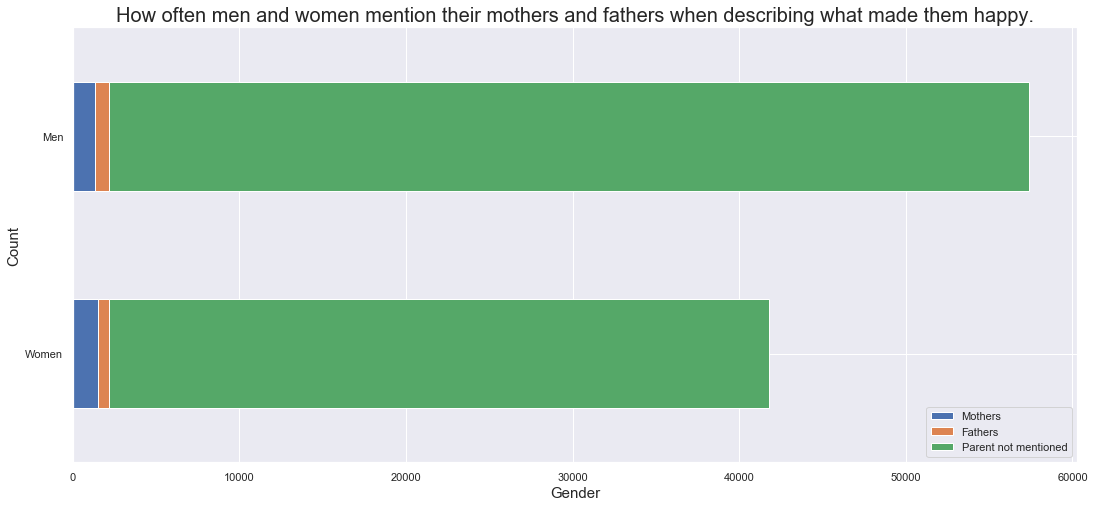

In [380]:
# Sons vs Daughters mentioned by Mothers and Fathers


plotdata = pd.DataFrame({
    "Mothers":[women_mentioning_mothers, men_mentioning_mothers],
    "Fathers":[women_mentioning_fathers, men_mentioning_fathers],
    "Parent not mentioned":[women_mentioning_none, men_mentioning_none],
    }, 
    index=['Women', 'Men']
)
plotdata.plot(kind="barh", stacked=True, figsize=(18,8))
plt.title("How often men and women mention their mothers and fathers when describing what made them happy.", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

## Mother Father Dataframe

In [396]:
# Make a new dataframe of snippets where wives or husbands were mentioned
df_mother_father = df[(df['mother_father_label']=='mother') | (df['mother_father_label']=='father')]

df_mother_father.shape

(4351, 24)

In [397]:
# Getting rid of duplicates
df_mother_father = df_mother_father.drop_duplicates(subset=['text_cleaned'])
df_mother_father.shape

(4014, 24)

In [398]:
# Getting rid of duplicates
df_mother_father = df_mother_father.drop_duplicates(subset=['text'])
df_mother_father.shape

(4014, 24)

In [384]:
# Remove the user that keeps mentioning 'Roti', his wife. The IDs are different for each entry,
# and the spelling is very slightly different, so this has to be done manually.
counter = 0
for row in df_mother_father['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'roti':
            df_mother_father = df_mother_father[df_mother_father.text_cleaned != row]
    counter += 1
    
df_mother_father.shape

(4003, 24)

In [385]:
# Create a new column of cleaned text without the words 'wife' or 'husband' in them.
remove_words = ['mother', 'mom', 'mommy', 'mama', 'ma', 'father', 'dad', 'daddy', 
                'pappa', 'pa']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df_mother_father['text_cleaned_no_mother_father'] = df_mother_father['text_cleaned'].str.replace(pat, '')

In [387]:
df_mother_father[['text', 'mother_father_label']].head()

,text,mother_father_label
1,My mother called out of the blue to tell me how proud she is of me.,mother
13,My family and i went to see Boss Daddy and had a good laugh during the movie.,father
15,I just got the news my mother in-law is coming to stay over for a few days this week.,mother
16,My mom called and said she was buying my sons birthday cake for him this week.,mother
24,My mom and dad came over for my sons birthday today.,father


## Scatterplot

In [388]:
corpus = st.CorpusFromPandas(df_mother_father,
                             category_col='mother_father_label',
                             text_col='text_cleaned_no_mother_father',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [389]:
html = st.produce_scattertext_explorer(corpus,
                                       category='mother',
                                       category_name='Mother',
                                       not_category_name='Father',
                                       minimum_term_frequency=50,
                                       pmi_threshold_coefficient=5,
                                       width_in_pixels=1000
                                      )

In [390]:
open('mother_father.html', 'wb').write(html.encode('utf-8'));

In [391]:
# Exploring one of the top words mentioned in relation to mothers: favorite
counter = 0
for row in df_mother_father['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'favorite':
            print(df_mother_father.iloc[counter]['text'])
    counter += 1
    
# Mom made or bought favorite food

I had one of my favorite recipes that my mom makes for dinner. I went to her house and she made her Chinese spaghetti with is an Oriental version of the Italian dish.
I went to lunch with my mom. We went to her favorite sushi bar and enjoyed a nice meal there.
My mother baked my favorite chicken dish on my anniversary
yesterday i went to my friend house and i had lunch with him and i was very happy and surprised because they had prepared food with my favorite dish fish and i ate very happily because it had very good taste. and it reminds me of my mother cooking.
yesterday  night i ate my favorite dish in the resturant because after a long time i am eating this dish and i was very happy because the food tasted like my mama was preparing and the food remind me of her because i missed her very much she is dead.
Last month i went to met my mother in my native place. she prepared my favorite dishes and i was very happy to eat because it reminds me of my childhood memories.
One of my favorit

In [395]:
# Exploring one of the top words mentioned in relation to fathers: presented
counter = 0
for row in df_mother_father['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'presented':
            print(df_mother_father.iloc[counter][['text', 'country']])
    counter += 1
    
# From india, fathers presenting things as gifts

text       Last month i presented my mom with a new dress on her birthday and she was happy that her son remembered her birthday and bought a new dress. and i too felt very happy because i am seeing big smile on my mother's face after a long time.
country    IND                                                                                                                                                                                                                                         
Name: 3029, dtype: object
text       My happiest moment in my life  was for my 20th birthday my dad presented me a new smart phone surprisingly dat day i was so exited. why because before this mobile i used a small black and white mobile.  i cant forget dat day in my life,dat was my first surprise given by my dad. after i had this mobile i have learned a lot of information from internet.
country    IND                                                                                                   

In [400]:
# Exploring one of the top words mentioned in relation to fathers: presented
counter = 0
for row in df_mother_father['text_cleaned']:
    wordList = re.sub("[^\w]", " ",  row).split()
    for word in wordList:
        if word == 'car':
            print(df_mother_father.iloc[counter][['text', 'country']])
    counter += 1

# Dad giving car as gift.

text       Last night father give me a surprise gift as CAR occasion of my birthday its a happiest event for me.
country    USA                                                                                                  
Name: 1176, dtype: object
text       a new car bought by my dad give me honor in the society
country    IND                                                    
Name: 1652, dtype: object
text       my father bought a new car for himself after 10 years
country    IND                                                  
Name: 2026, dtype: object
text       I fixed my car with my father to help.
country    USA                                   
Name: 2625, dtype: object
text       In past month i m very happy when i get surprised gift from my father, i received a car in that gift.
country    USA                                                                                                  
Name: 5088, dtype: object
text       I m very happy when i get surprise party fr

Name: 98311, dtype: object
